In [1]:
cd ..

C:\Users\Bob\CHPC\conformal_prediction\vigilant-computing-machine\source


In [2]:
# 'vigilant-computing-machine/source/util.py'
import util

import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

import Orange
from Orange.distance import Euclidean
import orangecontrib.conformal as cp

# set NumPy seed for Orange3-Conformal reproducibility
np.random.seed(42)

In [3]:
# set pwd to root of repository
repo_root = 'C:/Users/Bob/CHPC/conformal_prediction/vigilant-computing-machine/'
#repo_root = '/uufs/chpc.utah.edu/common/home/u0740821/conformal_prediction/vigilant-computing-machine'

os.chdir(repo_root)

In [4]:
# read in data
tab_random = util.read_csv_to_table('./data/random_with_header_for_orange.csv')
tab_signal = util.read_csv_to_table('./data/signal_with_header_for_orange.csv')
tab_missing = util.read_csv_to_table('./data/missing_with_header_for_orange.csv')
tab_imputed = util.read_csv_to_table('./data/imputed_with_header_for_orange.csv')

-----

-----

-----

# ADA

# Orange.modelling.ada_boost.SklAdaBoostClassificationLearner
# Orange.modelling.ada_boost.SklAdaBoostLearner
# Orange.modelling.SklAdaBoostLearner

In [ ]:
# res = util.run_inductive_inverse_probability(Orange.modelling.ada_boost.SklAdaBoostClassificationLearner(), tab_signal)
# res = util.run_inductive_inverse_probability(Orange.modelling.ada_boost.SklAdaBoostLearner(), tab_signal)
res = util.run_inductive_inverse_probability(Orange.modelling.SklAdaBoostLearner(), tab_signal)

In [ ]:
util.result_to_dict(res)

In [ ]:
util.preds_to_df(res.preds)

In [5]:
import pandas as pd

def sort_reindex(df_pred, col):
    # sort by provided column, update index to sorted order
    return df_pred.sort_values(by=col, ascending=False).reset_index(drop=True)

def plot_confidence_credibility_by_index(df_pred):
    df_pred.plot(y=['confidence', 'credibility'], use_index=True)

In [5]:
train, test = next(cp.evaluation.RandomSampler(tab_signal, a=2, b=1))
mod_ada_mon = util.fit_inductive_inverse_probability(Orange.modelling.SklAdaBoostLearner(), train)
pred_ada_mon = [mod_ada_mon.predict(x) for x in test]

,classes,confidence,credibility,eps,p,instance
0,[0],0.992857,0.798450,0.2,"[(0.7984496124031008, 0), (0.00714285714285714...","[0.38235294117647056, 0.0, 2.0, 0.428571428571..."
1,[0],0.992857,0.899225,0.2,"[(0.8992248062015504, 0), (0.00714285714285714...","[0.4117647058823529, 0.0, 2.0, 0.2857142857142..."
2,[0],0.992857,0.751938,0.2,"[(0.751937984496124, 0), (0.007142857142857143...","[0.3529411764705882, 0.0, 2.0, 0.5714285714285..."
3,[0],0.992857,0.875969,0.2,"[(0.875968992248062, 0), (0.007142857142857143...","[0.3529411764705882, 0.0, 2.0, 0.4285714285714..."
4,[0],0.992857,0.813953,0.2,"[(0.813953488372093, 0), (0.007142857142857143...","[0.3235294117647059, 0.0, 2.0, 0.2857142857142..."
...,...,...,...,...,...,...
395,[],0.922481,0.100000,0.2,"[(0.07751937984496124, 0), (0.1, 1)]","[0.5, 0.0, 2.0, 0.5714285714285714, 0.03846153..."
396,[],0.914729,0.092857,0.2,"[(0.08527131782945736, 0), (0.0928571428571428...","[0.4411764705882353, 1.0, 0.0, 0.7142857142857..."
397,[],0.914729,0.092857,0.2,"[(0.08527131782945736, 0), (0.0928571428571428...","[0.5, 0.0, 2.0, 0.42857142857142855, 0.0384615..."
398,[],0.914286,0.093023,0.2,"[(0.09302325581395349, 0), (0.0857142857142857...","[0.4411764705882353, 1.0, 0.0, 0.5714285714285..."


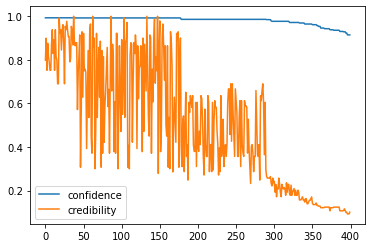

In [64]:
# set significance level to populate predictions ('classes')
df_ada_mon_2 = util.preds_to_df(util.set_eps(pred_ada_mon, 0.2))

# add column with example each prediction is based on
df_ada_mon_2['instance'] = test

# sort on confidence
df_ada_mon_2 = sort_reindex(df_ada_mon_2, 'confidence')

# Note: confidence/credibility do not change with respect to significance level
df_ada_mon_2.plot(y=['confidence', 'credibility'], use_index=True)
df_ada_mon_2

,classes,confidence,credibility,eps,p,instance
0,[0],0.992857,0.798450,0.05,"[(0.7984496124031008, 0), (0.00714285714285714...","[0.38235294117647056, 0.0, 2.0, 0.428571428571..."
1,[0],0.992857,0.899225,0.05,"[(0.8992248062015504, 0), (0.00714285714285714...","[0.4117647058823529, 0.0, 2.0, 0.2857142857142..."
2,[0],0.992857,0.751938,0.05,"[(0.751937984496124, 0), (0.007142857142857143...","[0.3529411764705882, 0.0, 2.0, 0.5714285714285..."
3,[0],0.992857,0.875969,0.05,"[(0.875968992248062, 0), (0.007142857142857143...","[0.3529411764705882, 0.0, 2.0, 0.4285714285714..."
4,[0],0.992857,0.813953,0.05,"[(0.813953488372093, 0), (0.007142857142857143...","[0.3235294117647059, 0.0, 2.0, 0.2857142857142..."
...,...,...,...,...,...,...
395,"[0, 1]",0.922481,0.100000,0.05,"[(0.07751937984496124, 0), (0.1, 1)]","[0.5, 0.0, 2.0, 0.5714285714285714, 0.03846153..."
396,"[0, 1]",0.914729,0.092857,0.05,"[(0.08527131782945736, 0), (0.0928571428571428...","[0.4411764705882353, 1.0, 0.0, 0.7142857142857..."
397,"[0, 1]",0.914729,0.092857,0.05,"[(0.08527131782945736, 0), (0.0928571428571428...","[0.5, 0.0, 2.0, 0.42857142857142855, 0.0384615..."
398,"[0, 1]",0.914286,0.093023,0.05,"[(0.09302325581395349, 0), (0.0857142857142857...","[0.4411764705882353, 1.0, 0.0, 0.5714285714285..."


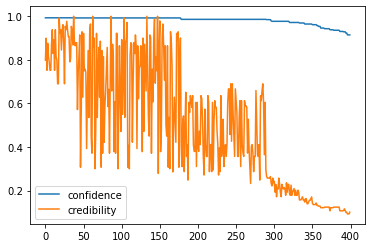

In [63]:
# set significance level to populate predictions ('classes')
df_ada_mon_05 = util.preds_to_df(util.set_eps(pred_ada_mon, 0.05))

# add column with example each prediction is based on
df_ada_mon_05['instance'] = test

# sort on confidence
df_ada_mon_05 = sort_reindex(df_ada_mon_05, 'confidence')

# Note: confidence/credibility do not change with respect to significance level
df_ada_mon_05.plot(y=['confidence', 'credibility'], use_index=True)
df_ada_mon_05

# Progressively Raise Train-to-Test Ratio (Mondrian=True)

C:\Users\Bob\anaconda3\envs\orange3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


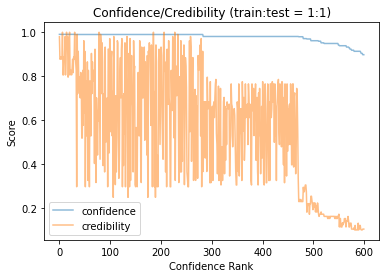

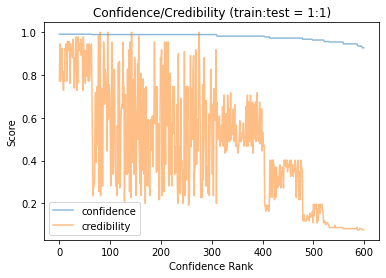

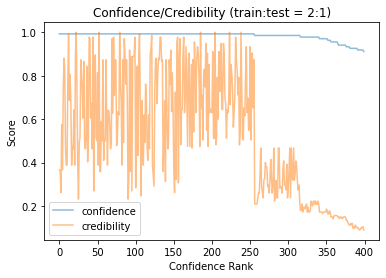

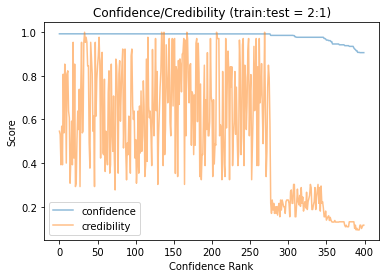

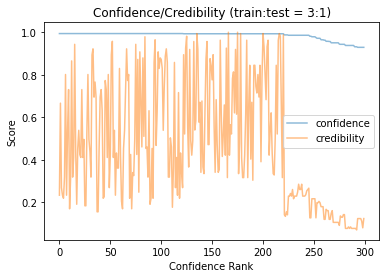

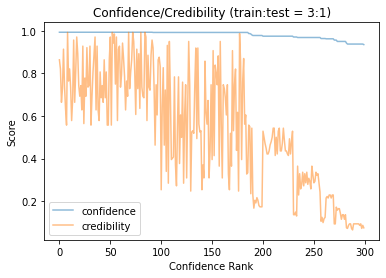

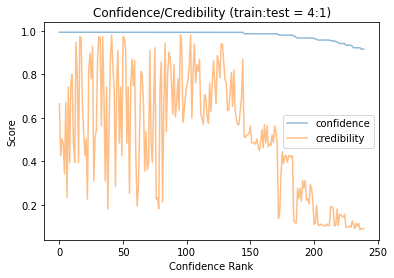

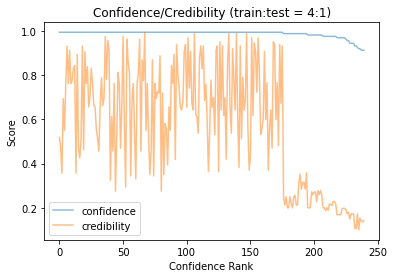

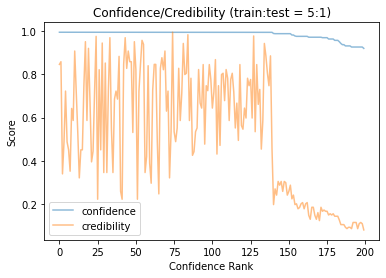

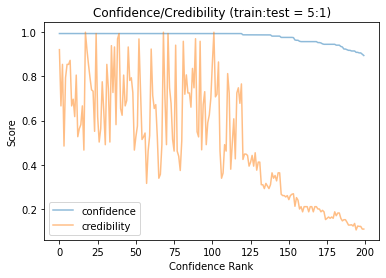

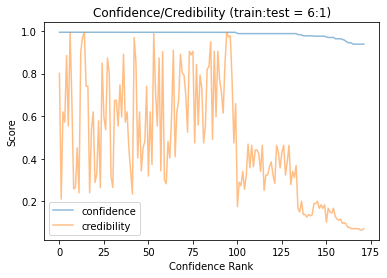

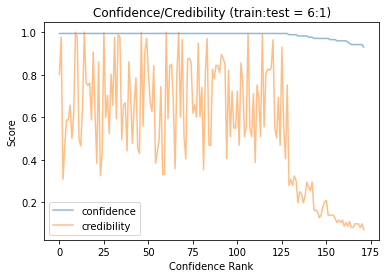

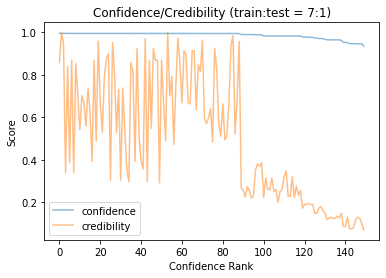

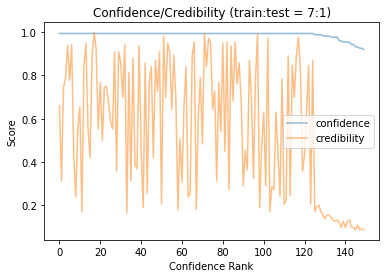

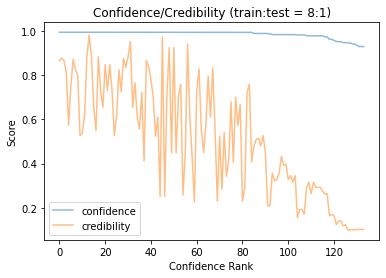

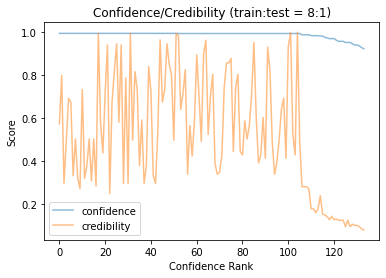

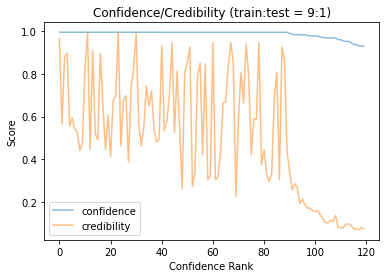

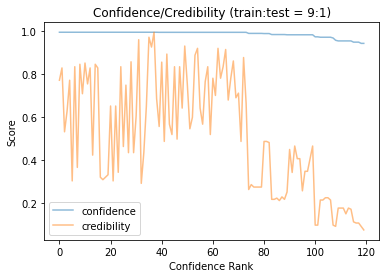

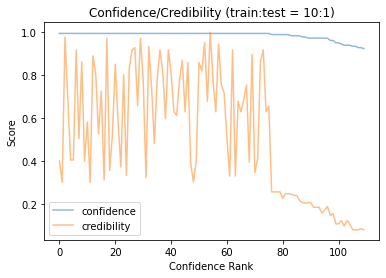

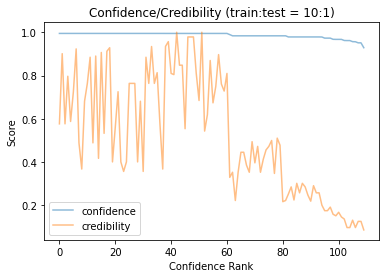

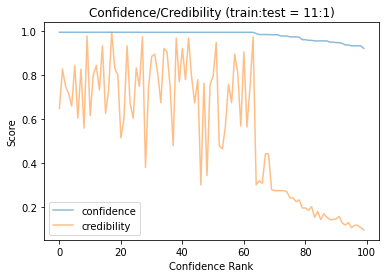

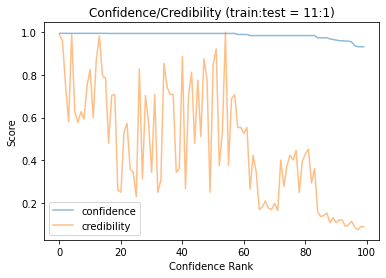

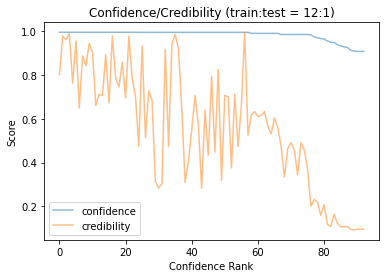

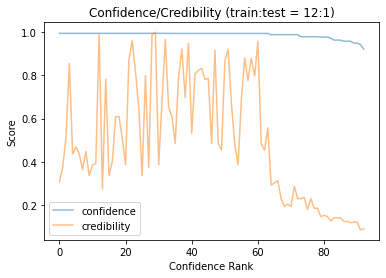

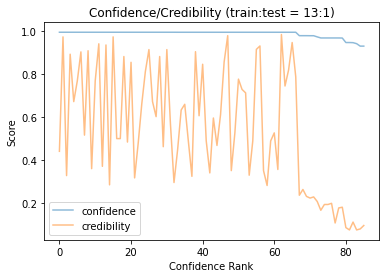

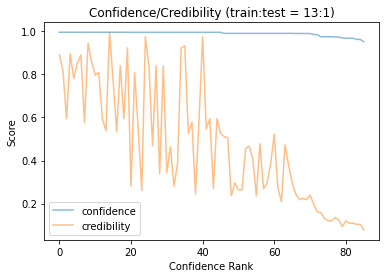

In [6]:
for i in range(1, 14):
    # run each ratio twice to illustrate run variability (in spite of np.random.seed being set)
    for j in range(1, 3):
        train, test = next(cp.evaluation.RandomSampler(tab_signal, a=i, b=1))
        mod_ada_mon = util.fit_inductive_inverse_probability(Orange.modelling.SklAdaBoostLearner(), train)
        pred_ada_mon = [mod_ada_mon.predict(x) for x in test]
        df_ada_mon = util.preds_to_df(pred_ada_mon)
        df_ada_mon['instance'] = test # add column with example each prediction is based on
        df_ada_mon = sort_reindex(df_ada_mon, 'confidence') # sort on confidence
        df_ada_mon.plot(y=['confidence', 'credibility'], 
                        use_index=True, 
                        xlabel='Confidence Rank', 
                        ylabel='Score', 
                        title=f'Confidence/Credibility (train:test = {i}:1)', 
                        alpha=0.5)

# Progressively Raise Test-to-Train Ratio (Mondrian=True)

C:\Users\Bob\anaconda3\envs\orange3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


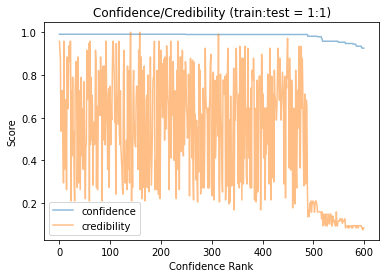

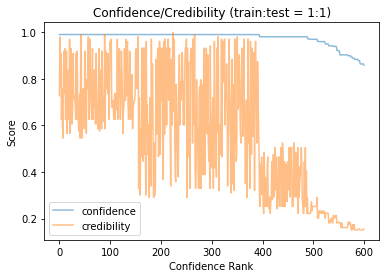

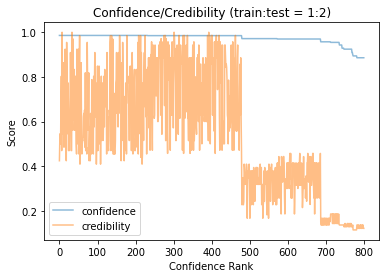

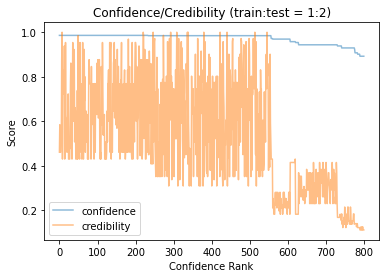

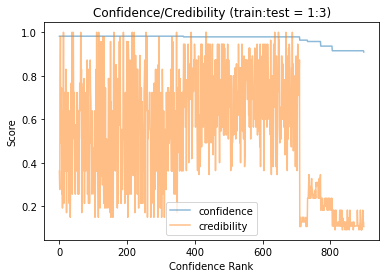

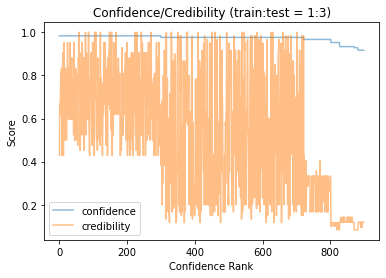

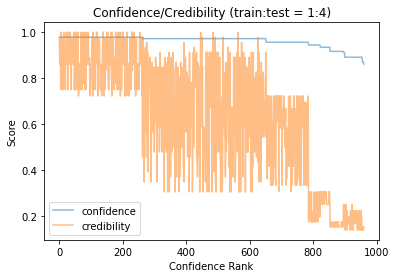

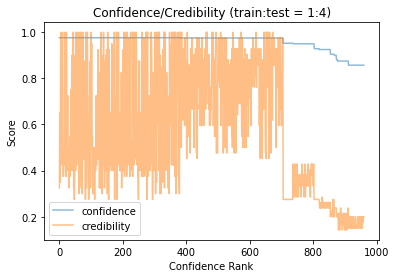

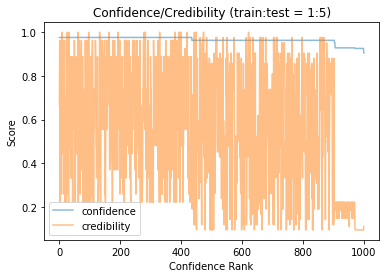

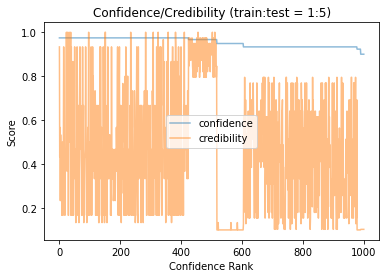

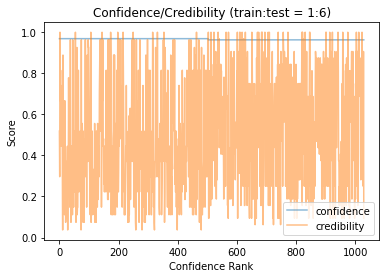

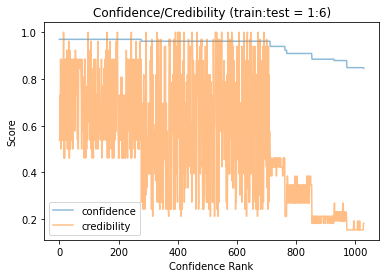

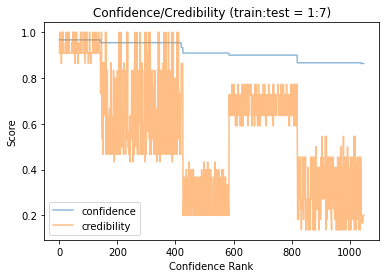

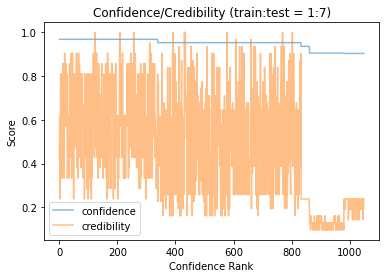

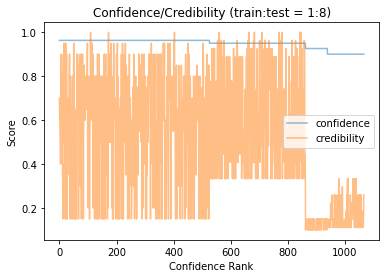

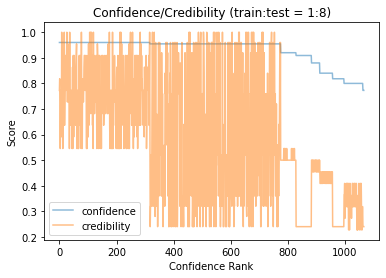

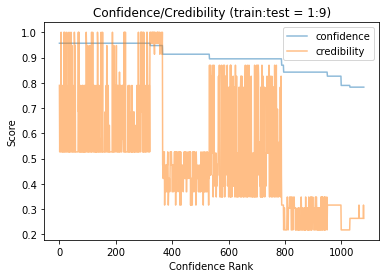

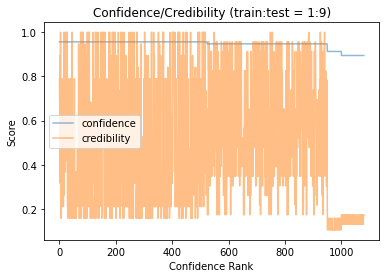

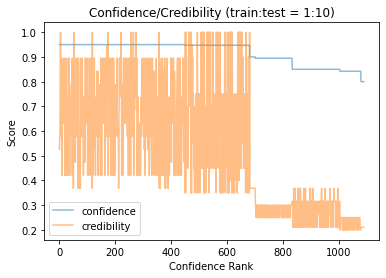

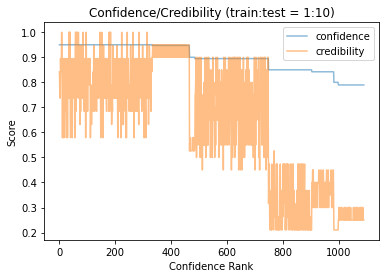

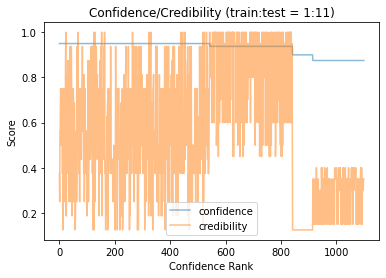

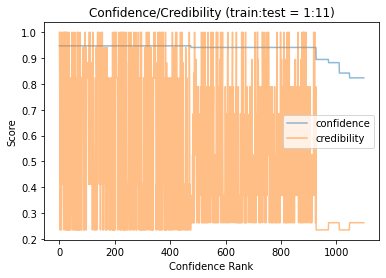

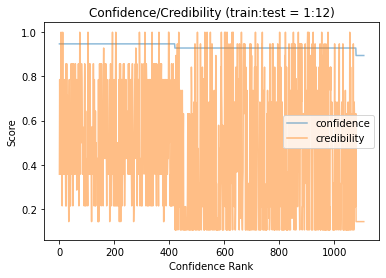

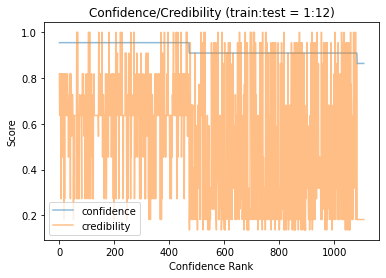

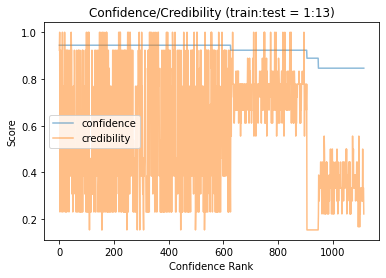

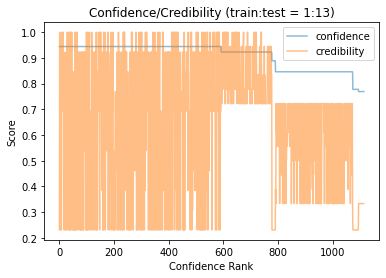

In [7]:
for i in range(1, 14):
    # run each ratio twice to illustrate run variability (in spite of np.random.seed being set)
    for j in range(1, 3):
        train, test = next(cp.evaluation.RandomSampler(tab_signal, a=1, b=i))
        mod_ada_mon = util.fit_inductive_inverse_probability(Orange.modelling.SklAdaBoostLearner(), train)
        pred_ada_mon = [mod_ada_mon.predict(x) for x in test]
        df_ada_mon = util.preds_to_df(pred_ada_mon)
        df_ada_mon['instance'] = test # add column with example each prediction is based on
        df_ada_mon = sort_reindex(df_ada_mon, 'confidence') # sort on confidence
        df_ada_mon.plot(y=['confidence', 'credibility'], 
                        use_index=True, 
                        xlabel='Confidence Rank', 
                        ylabel='Score', 
                        title=f'Confidence/Credibility (train:test = 1:{i})', 
                        alpha=0.5)

# Progressively Raise Train-to-Test Ratio (Mondrian=Frue)

C:\Users\Bob\anaconda3\envs\orange3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


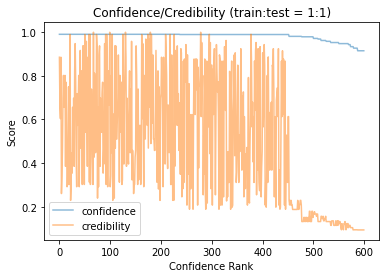

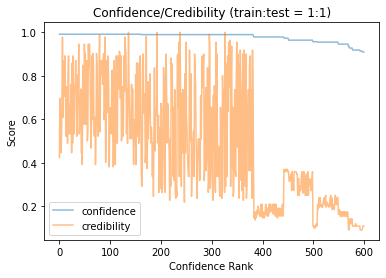

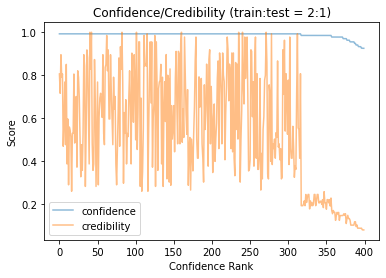

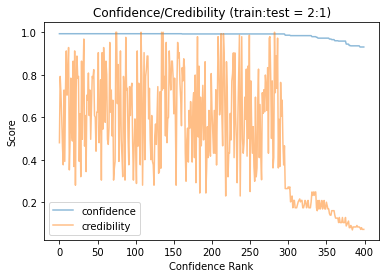

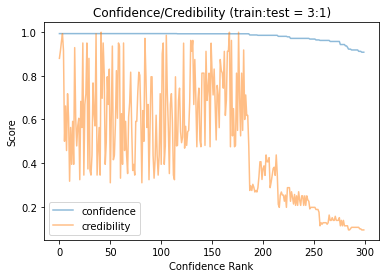

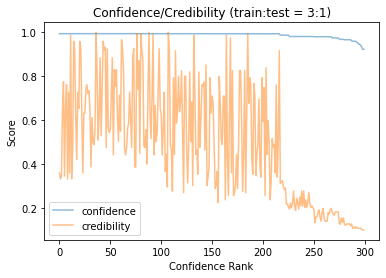

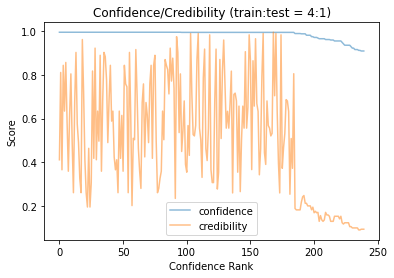

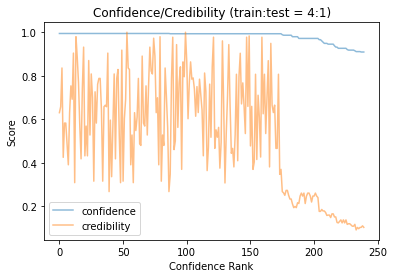

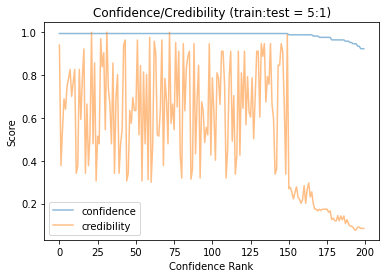

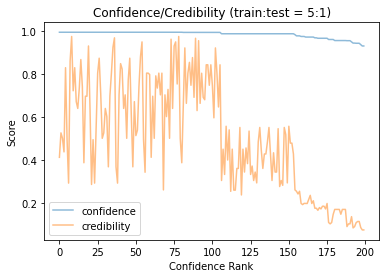

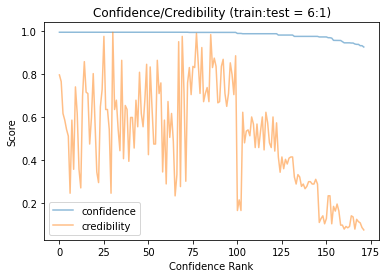

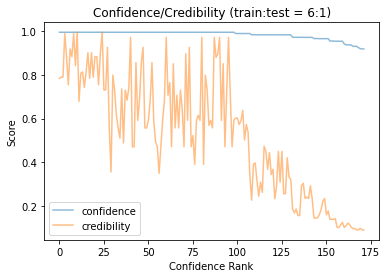

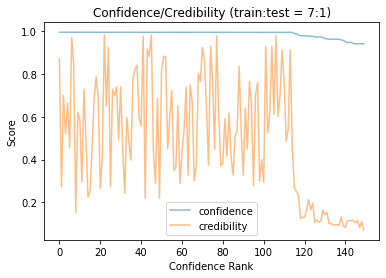

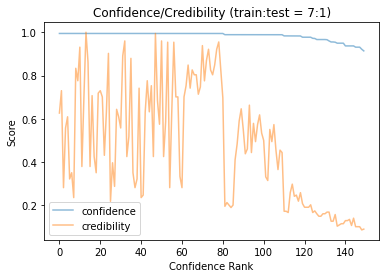

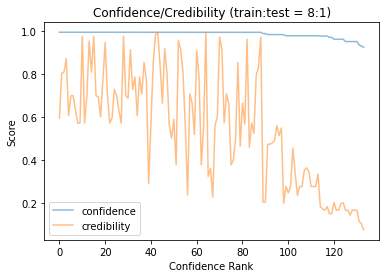

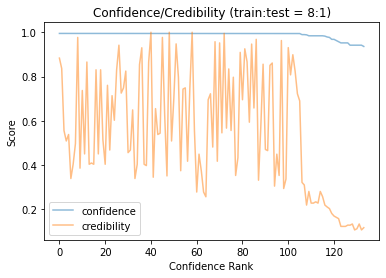

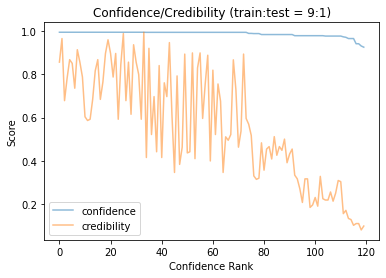

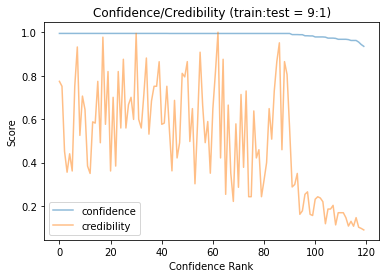

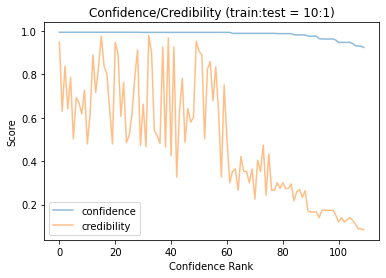

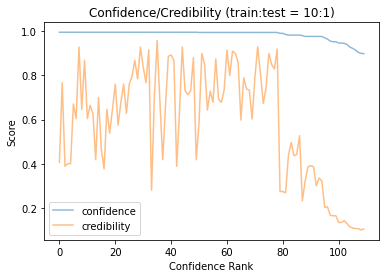

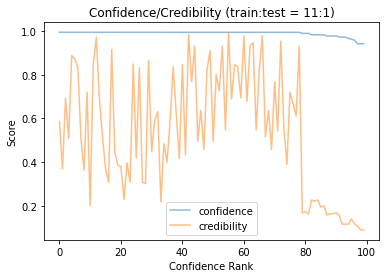

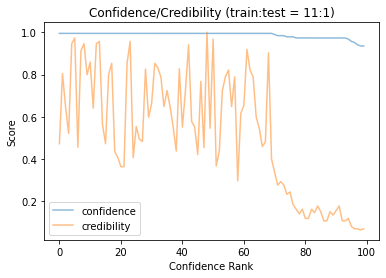

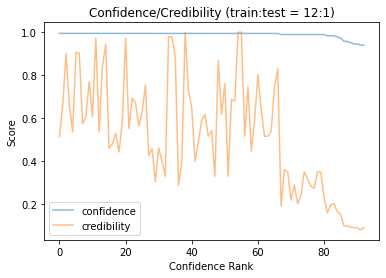

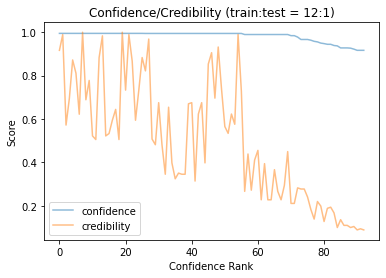

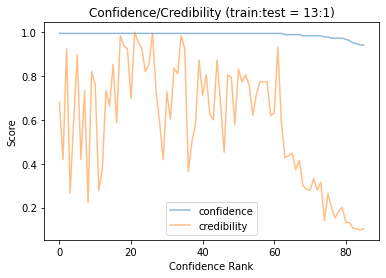

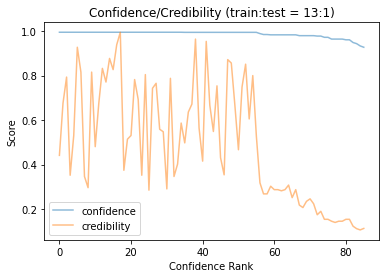

In [8]:
for i in range(1, 14):
    # run each ratio twice to illustrate run variability (in spite of np.random.seed being set)
    for j in range(1, 3):
        train, test = next(cp.evaluation.RandomSampler(tab_signal, a=i, b=1))
        mod_ada_mon = util.fit_inductive_inverse_probability(Orange.modelling.SklAdaBoostLearner(), train, mondrian=False)
        pred_ada_mon = [mod_ada_mon.predict(x) for x in test]
        df_ada_mon = util.preds_to_df(pred_ada_mon)
        df_ada_mon['instance'] = test # add column with example each prediction is based on
        df_ada_mon = sort_reindex(df_ada_mon, 'confidence') # sort on confidence
        df_ada_mon.plot(y=['confidence', 'credibility'], 
                        use_index=True, 
                        xlabel='Confidence Rank', 
                        ylabel='Score', 
                        title=f'Confidence/Credibility (train:test = {i}:1)', 
                        alpha=0.5)

# Progressively Raise Test-to-Train Ratio (Mondrian=False)

C:\Users\Bob\anaconda3\envs\orange3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


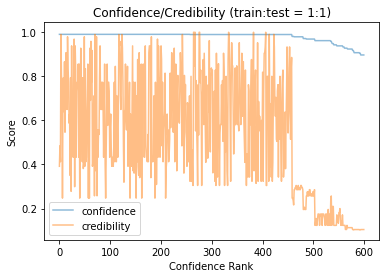

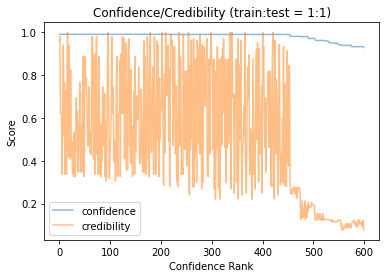

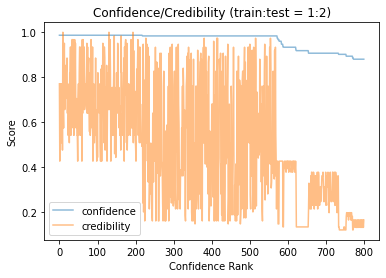

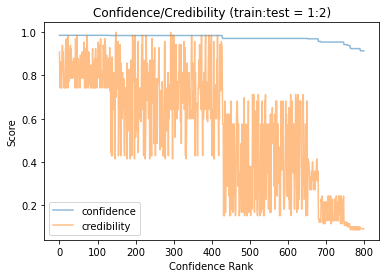

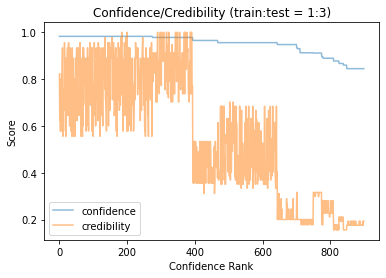

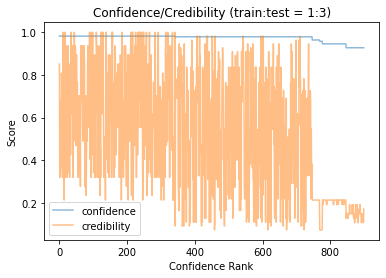

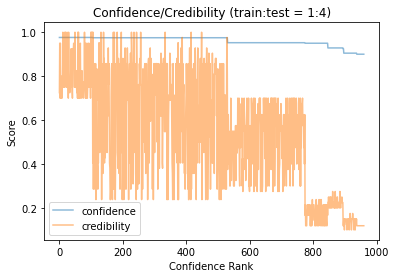

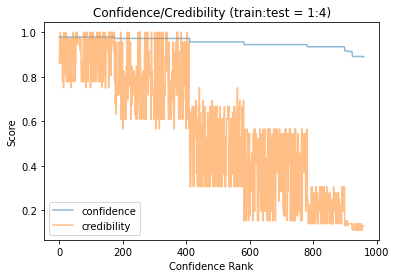

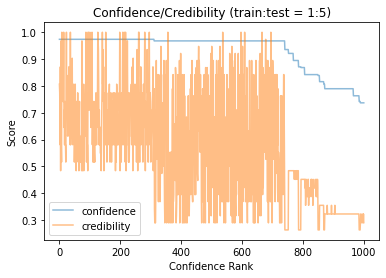

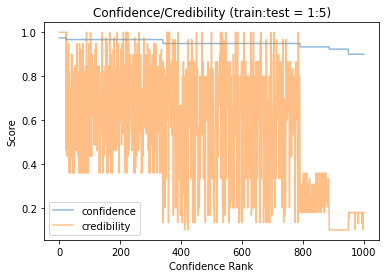

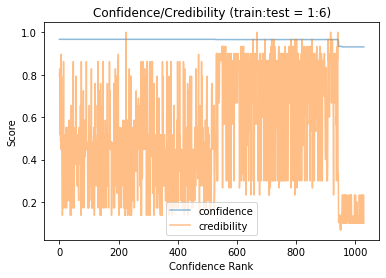

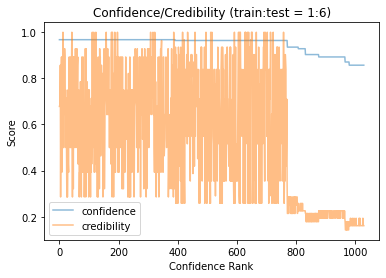

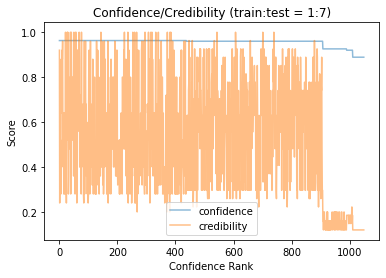

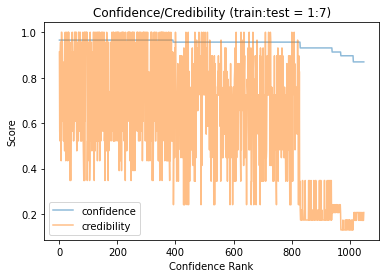

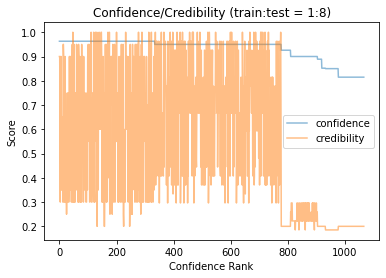

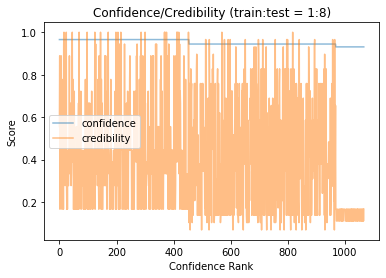

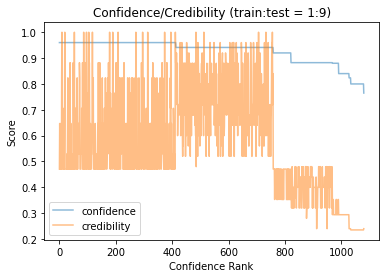

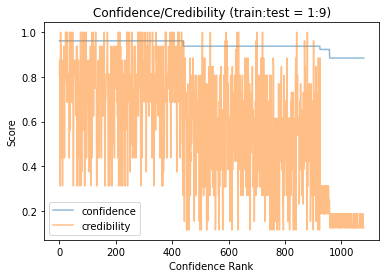

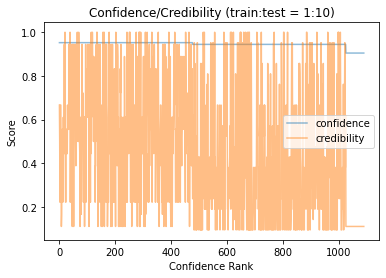

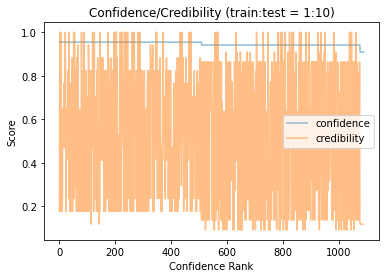

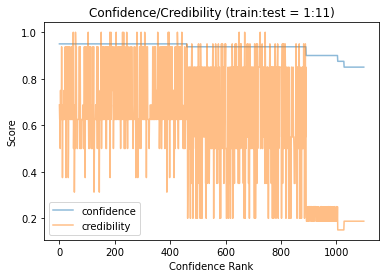

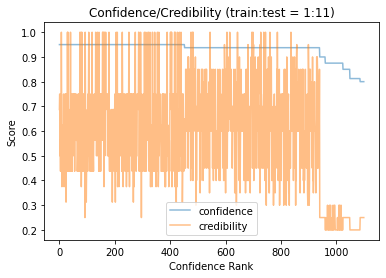

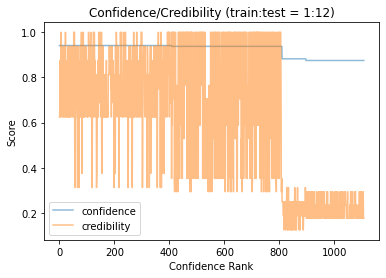

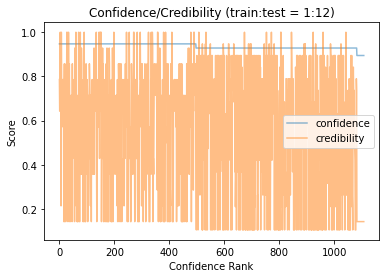

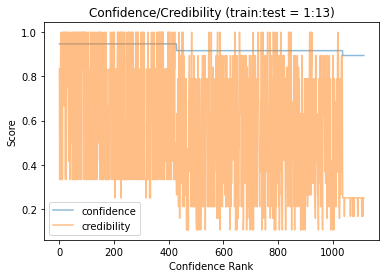

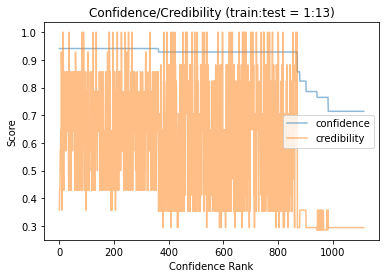

In [9]:
for i in range(1, 14):
    # run each ratio twice to illustrate run variability (in spite of np.random.seed being set)
    for j in range(1, 3):
        train, test = next(cp.evaluation.RandomSampler(tab_signal, a=1, b=i))
        mod_ada_mon = util.fit_inductive_inverse_probability(Orange.modelling.SklAdaBoostLearner(), train, mondrian=False)
        pred_ada_mon = [mod_ada_mon.predict(x) for x in test]
        df_ada_mon = util.preds_to_df(pred_ada_mon)
        df_ada_mon['instance'] = test # add column with example each prediction is based on
        df_ada_mon = sort_reindex(df_ada_mon, 'confidence') # sort on confidence
        df_ada_mon.plot(y=['confidence', 'credibility'], 
                        use_index=True, 
                        xlabel='Confidence Rank', 
                        ylabel='Score', 
                        title=f'Confidence/Credibility (train:test = 1:{i})', 
                        alpha=0.5)

-----

-----

----
# I-IP-ADA
----
## Fit Mondrian and non-Mondrian
##### Technically, this is a Label-Conditional Mondrian Conformal Predictor

In [ ]:
mod_ada_mon = util.fit_inductive_inverse_probability(Orange.modelling.SklAdaBoostLearner(), tab_signal)
mod_ada_non = util.fit_inductive_inverse_probability(Orange.modelling.SklAdaBoostLearner(), tab_signal, mondrian=False)

### BCRAT Data

In [ ]:
print(mod_ada_mon.domain)

### Mondrian - 5 examples from calibration set & corresponding nonconformity score

In [ ]:
print(mod_ada_mon.domain)
print(mod_ada_mon.calibrate[:5])
print()
print(mod_ada_mon.alpha[:5])

### non-Mondrian - 5 examples from calibration set & corresponding nonconformity score

In [ ]:
print(mod_ada_non.domain)
print(mod_ada_non.calibrate[:5])
print()
print(mod_ada_non.alpha[:5])

----
#### There does not appear to be an extremely obvious difference between Mondirian/non-Mondrian so far. Let's make a prediction for an example of each class with each conformal predictor and see if we observe any salient differences.
----

In [ ]:
print(tab_signal.domain)

# Get an example of each class
no_cancer_example = tab_signal[23]
print(no_cancer_example)
cancer_example = tab_signal[34]
print(cancer_example)

In [ ]:
print(mod_ada_mon.predict(cancer_example).p)
print(mod_ada_mon.predict(no_cancer_example).p)
print(mod_ada_non.predict(cancer_example).p)
print(mod_ada_non.predict(no_cancer_example).p)

----

# Mondrian non-Cancer

In [ ]:
print('{:<25}'.format(''), mod_ada_mon.domain)
print('{:<25}'.format('example :'), no_cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_ada_mon.predict(no_cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_ada_mon.predict(no_cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_ada_mon.predict(no_cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_ada_mon.predict(no_cancer_example).credibility())
print('{:<25}'.format('p :'), mod_ada_mon.predict(no_cancer_example).p)

----

# non-Mondrian non-Cancer

In [ ]:
print('{:<25}'.format(''), mod_ada_non.domain)
print('{:<25}'.format('example :'), no_cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_ada_non.predict(no_cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_ada_non.predict(no_cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_ada_non.predict(no_cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_ada_non.predict(no_cancer_example).credibility())
print('{:<25}'.format('p :'), mod_ada_non.predict(no_cancer_example).p)

## Observation: 

___Label-Conditional Mondrian Inductive Conformal Predictor___ 

___Inductive Conformal Predictor___ 

----

----

----

# Mondrian Cancer

In [ ]:
print('{:<25}'.format(''), mod_ada_mon.domain)
print('{:<25}'.format('example :'), cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_ada_mon.predict(cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_ada_mon.predict(cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_ada_mon.predict(cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_ada_mon.predict(cancer_example).credibility())
print('{:<25}'.format('p :'), mod_ada_mon.predict(cancer_example).p)

----

# non-Mondrian Cancer

In [ ]:
print('{:<25}'.format(''), mod_ada_non.domain)
print('{:<25}'.format('example :'), cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_ada_non.predict(cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_ada_non.predict(cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_ada_non.predict(cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_ada_non.predict(cancer_example).credibility())
print('{:<25}'.format('p :'), mod_ada_non.predict(cancer_example).p)

## Observation: 

----

___Label-Conditional Mondrian Inductive Conformal Predictor___


----

___Inductive Conformal Predictor___ 


----

----
## Conclusion:

 ___Label-Conditional Mondrian Inductive Conformal Predictor___ 
 
 (class-impartial) ___Inductive Conformal Predictor___

----

In [ ]:
print(sum(tab_signal.Y))
print(len(tab_signal.Y) - sum(tab_signal.Y))

We can see that our dataset does not exhibit class imbalance. 

In reality, it is unlikely that ~50% of the population develops breast cancer within their lifetime.

This makes one inclined to believe that if we repeat the above experiment, but first remove half of the cancer examples, that we would see further improvement in the accuracy (single) or further reduction in the loss of precision (multiple) of the (Label-Conditional) Mondrian Conformal Predictor

----

# Remove half the cancer examples and repeat the experiment

In [ ]:
cancer = tab_signal[np.array(tab_signal.Y == 1)]
half = int(len(cancer)/2)
half_cancer = cancer[:half]
no_cancer = tab_signal[np.array(tab_signal.Y == 0)]
tab_half = Orange.data.Table.concatenate([half_cancer, no_cancer])
print(sum(tab_signal.Y==1), '/', len(tab_signal))
print(sum(tab_half.Y==1), '/', len(tab_half))

In [ ]:
mod_ada_mon_half = util.fit_inductive_inverse_probability(Orange.modelling.SklAdaBoostLearner(), tab_half)
mod_ada_non_half = util.fit_inductive_inverse_probability(Orange.modelling.SklAdaBoostLearner(), tab_half, mondrian=False)

----

# Mondrian non-Cancer (half)

In [ ]:
print('{:<25}'.format(''), mod_ada_mon_half.domain)
print('{:<25}'.format('example :'), no_cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_ada_mon_half.predict(no_cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_ada_mon_half.predict(no_cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_ada_mon_half.predict(no_cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_ada_mon_half.predict(no_cancer_example).credibility())
print('{:<25}'.format('p :'), mod_ada_mon_half.predict(no_cancer_example).p)

----

# non-Mondrian non-Cancer

In [ ]:
print('{:<25}'.format(''), mod_ada_non_half.domain)
print('{:<25}'.format('example :'), no_cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_ada_non_half.predict(no_cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_ada_non_half.predict(no_cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_ada_non_half.predict(no_cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_ada_non_half.predict(no_cancer_example).credibility())
print('{:<25}'.format('p :'), mod_ada_non_half.predict(no_cancer_example).p)

## Observation: 

----

___Label-Conditional Mondrian Inductive Conformal Predictor___

Unexpectedly, failed to guarantee the ***accuracy*** of the prediction at either significance level without sacrificing ___precision___ (multiple)--losing confidence from the mid-90's to the mid-70's and having a higher probability corresponding to the incorrect class.

----

___Inductive Conformal Predictor___ 

Correctly predicted the non-cancer/low-risk patient at both significance levels and did so with increased confidence--somewhat expectedly, as there were approximately twice as many examples of the non-cancer/low-risk case.

----

----

# Mondrian Cancer

In [ ]:
print('{:<25}'.format(''), mod_ada_mon_half.domain)
print('{:<25}'.format('example :'), cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_ada_mon_half.predict(cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_ada_mon_half.predict(cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_ada_mon_half.predict(cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_ada_mon_half.predict(cancer_example).credibility())
print('{:<25}'.format('p :'), mod_ada_mon_half.predict(cancer_example).p)

----

# non-Mondrian Cancer

In [ ]:
print('{:<25}'.format(''), mod_ada_non_half.domain)
print('{:<25}'.format('example :'), cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_ada_non_half.predict(cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_ada_non_half.predict(cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_ada_non_half.predict(cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_ada_non_half.predict(cancer_example).credibility())
print('{:<25}'.format('p :'), mod_ada_non_half.predict(cancer_example).p)

## Observation: 

----

___Label-Conditional Mondrian Inductive Conformal Predictor___

As expected, correctly predicted the cancer/high-risk case with the same values as before--in spite of ther being only half as many examples of the cancer/high-risk case in the dataset as non-cancer/low-risk examples.

----

___Inductive Conformal Predictor___ 

Correctly predicted the cancer/high-risk case in the same manner as it had previously at the respective significance levels--though with slightly reduced credibility and, unexpectedly, slightly increased confidence.

----

----
## Conclusion:

Sleep on the implications of class imbalance on  ___Label-Conditional Mondrian Inductive Conformal Predictor___ compared to (class-impartial) ___Inductive Conformal Predictor___


##### TODO


-----

-----

# KNN

# Orange.modelling.knn.KNNLearner
# Orange.modelling.KNNLearner

# Orange.classification.knn.KNNLearner
# Orange.classification.KNNLearner

In [ ]:
# res = util.run_inductive_inverse_probability(Orange.modelling.knn.KNNLearner(), tab_signal)
# res = util.run_inductive_inverse_probability(Orange.modelling.KNNLearner(), tab_signal)
# res = util.run_inductive_inverse_probability(Orange.classification.knn.KNNLearner(), tab_signal)
res = util.run_inductive_inverse_probability(Orange.classification.KNNLearner(), tab_signal)

In [ ]:
util.result_to_dict(res)

-----

----
# I-IP-KNN
----
## Fit Mondrian and non-Mondrian
##### Technically, this is a Label-Conditional Mondrian Conformal Predictor

In [ ]:
mod_knn_mon = util.fit_inductive_inverse_probability(Orange.classification.KNNLearner(), tab_signal)
mod_knn_non = util.fit_inductive_inverse_probability(Orange.classification.KNNLearner(), tab_signal, mondrian=False)

### BCRAT Data

In [ ]:
print(mod_knn_mon.domain)

### Mondrian - 5 examples from calibration set & corresponding nonconformity score

In [ ]:
print(mod_knn_mon.domain)
print(mod_knn_mon.calibrate[:5])
print()
print(mod_knn_mon.alpha[:5])

### non-Mondrian - 5 examples from calibration set & corresponding nonconformity score

In [ ]:
print(mod_knn_non.domain)
print(mod_knn_non.calibrate[:5])
print()
print(mod_knn_non.alpha[:5])

----
#### There does not appear to be an extremely obvious difference between Mondirian/non-Mondrian so far. Let's make a prediction for an example of each class with each conformal predictor and see if we observe any salient differences.
----

In [ ]:
print(tab_signal.domain)

# Get an example of each class
no_cancer_example = tab_signal[23]
print(no_cancer_example)
cancer_example = tab_signal[34]
print(cancer_example)

In [ ]:
print(mod_knn_mon.predict(cancer_example).p)
print(mod_knn_mon.predict(no_cancer_example).p)
print(mod_knn_non.predict(cancer_example).p)
print(mod_knn_non.predict(no_cancer_example).p)

----

# Mondrian non-Cancer

In [ ]:
print('{:<25}'.format(''), mod_knn_mon.domain)
print('{:<25}'.format('example :'), no_cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_knn_mon.predict(no_cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_knn_mon.predict(no_cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_knn_mon.predict(no_cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_knn_mon.predict(no_cancer_example).credibility())
print('{:<25}'.format('p :'), mod_knn_mon.predict(no_cancer_example).p)

----

# non-Mondrian non-Cancer

In [ ]:
print('{:<25}'.format(''), mod_knn_non.domain)
print('{:<25}'.format('example :'), no_cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_knn_non.predict(no_cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_knn_non.predict(no_cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_knn_non.predict(no_cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_knn_non.predict(no_cancer_example).credibility())
print('{:<25}'.format('p :'), mod_knn_non.predict(no_cancer_example).p)

## Observation: 

___Label-Conditional Mondrian Inductive Conformal Predictor___ correctly predicted the non-cancer/low-risk patient at both the significance level of 0.2 and 0.05

___Inductive Conformal Predictor___ correctly predicted the non-cancer/low-risk patient at both significance levels, but failed to guarantee the ***accuracy*** of the prediction at the 0.05 significance level without sacrificing ___precision___ (multiple)

----

### Note: repeating produces varing results, disregard until more robust solution achieved (CrossClassifier? Custom Combination (ensemble) of (Inductive/Cross) + (ADA/RF/etc.)?)

----

----

# Mondrian Cancer

In [ ]:
print('{:<25}'.format(''), mod_knn_mon.domain)
print('{:<25}'.format('example :'), cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_knn_mon.predict(cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_knn_mon.predict(cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_knn_mon.predict(cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_knn_mon.predict(cancer_example).credibility())
print('{:<25}'.format('p :'), mod_knn_mon.predict(cancer_example).p)

----

# non-Mondrian Cancer

In [ ]:
print('{:<25}'.format(''), mod_knn_non.domain)
print('{:<25}'.format('example :'), cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_knn_non.predict(cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_knn_non.predict(cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_knn_non.predict(cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_knn_non.predict(cancer_example).credibility())
print('{:<25}'.format('p :'), mod_knn_non.predict(cancer_example).p)

## Observation: 

----

___Label-Conditional Mondrian Inductive Conformal Predictor___



----

___Inductive Conformal Predictor___ 


----

----
## Conclusion:

___Label-Conditional Mondrian Inductive Conformal Predictor___ 

(class-impartial) ___Inductive Conformal Predictor___

----

In [ ]:
print(sum(tab_signal.Y))
print(len(tab_signal.Y) - sum(tab_signal.Y))

We can see that our dataset does not exhibit class imbalance. 

In reality, it is unlikely that ~50% of the population develops breast cancer within their lifetime.

This makes one inclined to believe that if we repeat the above experiment, but first remove half of the cancer examples, that we would see further improvement in the accuracy (single) or further reduction in the loss of precision (multiple) of the (Label-Conditional) Mondrian Conformal Predictor

----

# Remove half the cancer examples and repeat the experiment

In [ ]:
cancer = tab_signal[np.array(tab_signal.Y == 1)]
half = int(len(cancer)/2)
half_cancer = cancer[:half]
no_cancer = tab_signal[np.array(tab_signal.Y == 0)]
tab_half = Orange.data.Table.concatenate([half_cancer, no_cancer])
print(sum(tab_signal.Y==1), '/', len(tab_signal))
print(sum(tab_half.Y==1), '/', len(tab_half))

In [ ]:
mod_knn_mon_half = util.fit_inductive_inverse_probability(Orange.classification.KNNLearner(), tab_half)
mod_knn_non_half = util.fit_inductive_inverse_probability(Orange.classification.KNNLearner(), tab_half, mondrian=False)

----

# Mondrian non-Cancer (half)

In [ ]:
print('{:<25}'.format(''), mod_knn_mon_half.domain)
print('{:<25}'.format('example :'), no_cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_knn_mon_half.predict(no_cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_knn_mon_half.predict(no_cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_knn_mon_half.predict(no_cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_knn_mon_half.predict(no_cancer_example).credibility())
print('{:<25}'.format('p :'), mod_knn_mon_half.predict(no_cancer_example).p)

----

# non-Mondrian non-Cancer

In [ ]:
print('{:<25}'.format(''), mod_knn_non_half.domain)
print('{:<25}'.format('example :'), no_cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_knn_non_half.predict(no_cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_knn_non_half.predict(no_cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_knn_non_half.predict(no_cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_knn_non_half.predict(no_cancer_example).credibility())
print('{:<25}'.format('p :'), mod_knn_non_half.predict(no_cancer_example).p)

## Observation: 

----

___Label-Conditional Mondrian Inductive Conformal Predictor___

Unexpectedly, failed to guarantee the ***accuracy*** of the prediction at either significance level without sacrificing ___precision___ (multiple)--losing confidence from the mid-90's to the mid-70's and having a higher probability corresponding to the incorrect class.

----

___Inductive Conformal Predictor___ 

Correctly predicted the non-cancer/low-risk patient at both significance levels and did so with increased confidence--somewhat expectedly, as there were approximately twice as many examples of the non-cancer/low-risk case.

----

### Note: repeating produces varing results, disregard until more robust solution achieved (CrossClassifier? Custom Combination (ensemble) of (Inductive/Cross) + (ADA/RF/etc.)?)

----

----

# Mondrian Cancer

In [ ]:
print('{:<25}'.format(''), mod_knn_mon.domain)
print('{:<25}'.format('example :'), cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_knn_mon.predict(cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_knn_mon.predict(cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_knn_mon.predict(cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_knn_mon.predict(cancer_example).credibility())
print('{:<25}'.format('p :'), mod_knn_mon.predict(cancer_example).p)

----

# non-Mondrian Cancer

In [ ]:
print('{:<25}'.format(''), mod_knn_non_half.domain)
print('{:<25}'.format('example :'), cancer_example)
print('{:<25}'.format('pred_class @ eps=0.2  :'), mod_knn_non_half.predict(cancer_example).classes(eps=0.2))
print('{:<25}'.format('pred_class @ eps=0.05 :'), mod_knn_non_half.predict(cancer_example).classes(eps=0.05))
print('{:<25}'.format('conf :'), mod_knn_non_half.predict(cancer_example).confidence())
print('{:<25}'.format('cred :'), mod_knn_non_half.predict(cancer_example).credibility())
print('{:<25}'.format('p :'), mod_knn_non_half.predict(cancer_example).p)

## Observation: 

----

___Label-Conditional Mondrian Inductive Conformal Predictor___

As expected, correctly predicted the cancer/high-risk case with the same values as before--in spite of ther being only half as many examples of the cancer/high-risk case in the dataset as non-cancer/low-risk examples.

----

___Inductive Conformal Predictor___ 

Correctly predicted the cancer/high-risk case in the same manner as it had previously at the respective significance levels--though with slightly reduced credibility and, unexpectedly, slightly increased confidence.

----

----
## Conclusion:

Sleep on the implications of class imbalance on  ___Label-Conditional Mondrian Inductive Conformal Predictor___ compared to (class-impartial) ___Inductive Conformal Predictor___


##### TODO


-----

-----

-----

# Random Forest

# Orange.modelling.randomforest.RandomForestLearner
# Orange.modelling.RandomForestLearner
# Orange.modelling.randomforest.RFClassification

In [ ]:
# res = util.run_inductive_inverse_probability(Orange.modelling.randomforest.RandomForestLearner(), tab_signal)
# res = util.run_inductive_inverse_probability(Orange.modelling.RandomForestLearner(), tab_signal)
res = util.run_inductive_inverse_probability(Orange.modelling.randomforest.RFClassification(), tab_signal)

In [ ]:
util.result_to_dict(res)

-----

-----

-----

# Logistic Regression

# Orange.classification.LogisticRegressionLearner

In [ ]:
res = util.run_inductive_inverse_probability(Orange.classification.LogisticRegressionLearner(),
                                             tab_signal)

In [ ]:
util.result_to_dict(res)

----

----

----

In [ ]:
# default SVM learner
def svm_learner():
    return Orange.classification.SVMLearner(C=1.0,
                                            kernel='rbf',
                                            degree=3,
                                            gamma='auto',
                                            probability=False,
                                            tol=0.001,
                                            cache_size=200,
                                            max_iter=-1)

----

In [ ]:
results_random = util.run_inductive_inverse_probability(svm_learner(), tab_random, mondrian=False)
results_random_mondrian = util.run_inductive_inverse_probability(svm_learner(), tab_random, mondrian=True)
results_signal = util.run_inductive_inverse_probability(svm_learner(), tab_signal, mondrian=False)
results_signal_mondrian = util.run_inductive_inverse_probability(svm_learner(), tab_signal, mondrian=True)

In [ ]:
util.preds_to_df(results_random.preds)

In [ ]:
util.preds_to_df(results_random_mondrian.preds)

In [ ]:
util.preds_to_df(results_signal.preds)

In [ ]:
util.preds_to_df(results_signal_mondrian.preds)

----

----

----

# Individual Prediction

In [ ]:
ic = util.fit_inductive_inverse_probability(Orange.classification.LogisticRegressionLearner(),
                                            tab_signal, 
                                            mondrian=True)
pred = ic.predict(tab_signal[0], eps=0.05)
util.pred_to_dict(pred)

## Access underlying model and check prediction

In [ ]:
ic.nc_measure.model.skl_model.predict(tab_signal.X[0].reshape(1,-1))

## Looks like One-Hot Encoding is happening under the hood

In [ ]:
# ValueError: X has 7 features, but LogisticRegression is expecting 27 features as input.
ic.nc_measure.model.domain

----

----

----